In [27]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [69]:
index = {}
images = {}

# loop over the image paths
for imagePath in glob.glob('src' + "/large_*.jpg"):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist
    

imagePath = 'src/small_8.jpg'
filename = imagePath[imagePath.rfind("/") + 1:]
image = cv2.imread(imagePath)
images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# extract a 3D RGB color histogram from the image,
# using 8 bins per channel, normalize, and update
# the index
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
    [0, 256, 0, 256, 0, 256])
hist = cv2.normalize(hist, hist).flatten()
index[filename] = hist

In [70]:
hist.shape

(512,)

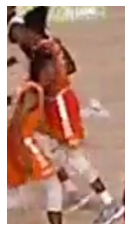

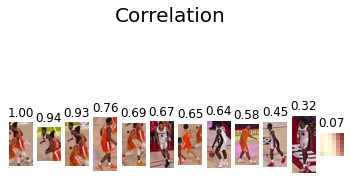

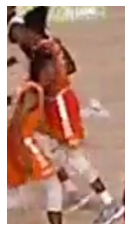

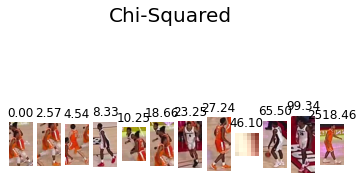

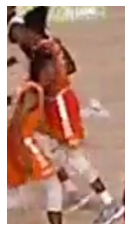

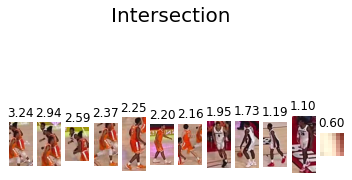

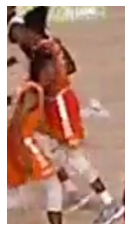

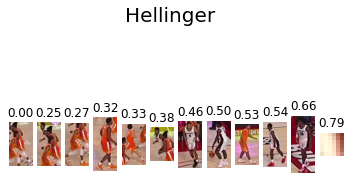

In [72]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL),
        ("Chi-Squared", cv2.HISTCMP_CHISQR),
        ("Intersection", cv2.HISTCMP_INTERSECT),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
    # initialize the results dictionary and the sort
    # direction
    results = {}
    reverse = False
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True
        

    for (k, hist) in index.items():
        d = cv2.compareHist(index["large_8.jpg"], hist, method)
        results[k] = d
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
    

    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images["large_8.jpg"])
    plt.axis("off")
    # initialize the results figure
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize = 20)
    # loop over the results
    for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%.2f" % (v))
        plt.imshow(images[k])
        plt.axis("off")
    # show the OpenCV methods
    plt.show()

In [37]:
cost = np.arange(50)
cost = cost.reshape((10,5))
cost[1][2]

7

In [11]:
images.keys()

dict_keys(['large_6.jpg', 'large_1.jpg', 'large_2.jpg', 'large_8.jpg', 'large_3.jpg', 'large_7.jpg', 'large_9.jpg', 'large_5.jpg', 'large_0.jpg', 'large_4.jpg', 'large_%d.jpg'])

### Clustarization of players

In [49]:
import numpy as np
from sklearn.cluster import KMeans

data = []
labels = []
for (k, hist) in index.items():
    labels.append(k)
    data.append(hist)
    
data = np.array(data)

km = KMeans(n_clusters = 2, init="k-means++").fit(data)

0


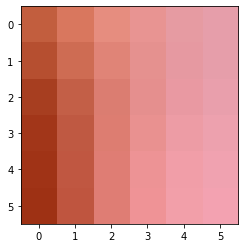

1


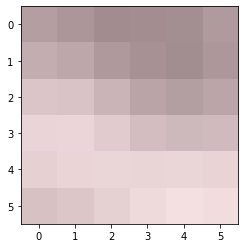

1


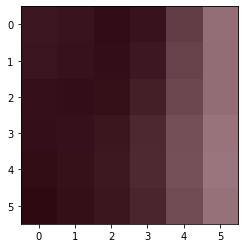

0


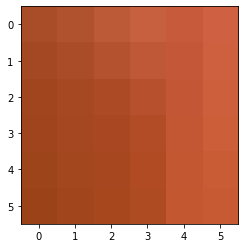

1


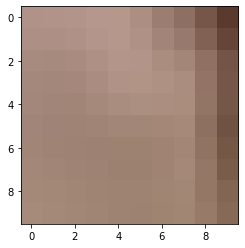

0


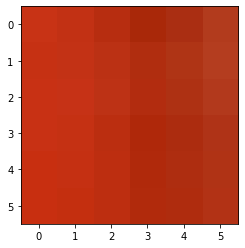

0


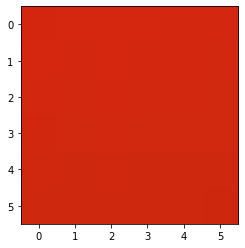

1


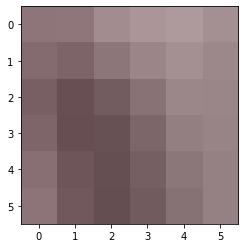

1


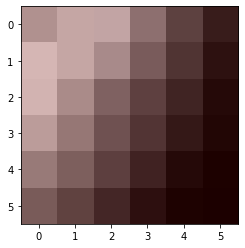

1


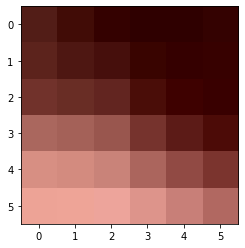

0


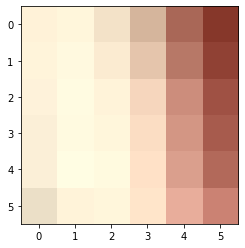

In [50]:
for i in range(len(km.labels_)):
    
    print(km.labels_[i])
    k = labels[i]
    plt.imshow(images[k])
    plt

In [53]:
a = []
for i in range(10):
    b = []
    for j in range(2):
        b.append([i])
        
    a.append(b)

In [58]:
np.concatenate(np.array(a))

array([[0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [3],
       [3],
       [4],
       [4],
       [5],
       [5],
       [6],
       [6],
       [7],
       [7],
       [8],
       [8],
       [9],
       [9]])

In [64]:
from collections import Counter
cls = [1,0,0,1,1,1,1,1,1,1,1,0]

cnt = Counter(cls)
mst_cmn = cnt.most_common()[0][0]

cls = [x if x==mst_cmn else mst_cmn for x in cls]

In [65]:
cls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]